In [81]:
from sklearn.feature_extraction.text import CountVectorizer  # 피처 벡터화
from sklearn.metrics.pairwise import cosine_similarity  # 코사인 유사도

In [1]:
#건대 군자 광진

import pandas as pd
review=pd.read_csv('건대_군자_광진_total_review_list.csv')
review


,Unnamed: 0,가게이름,리뷰,맛평가
0,0,원조할아버지손두부,예전 초당할머니 순두부는 살짝 변해서여길 못따라옴흰순두부는 맛과 향이 살짝 비릴수 ...,맛있다
1,1,원조할아버지손두부,아차산 등산 후 내려오는 길에 필수코스처럼 되어버린 두부집. 늘 대기가 조금씩 있는...,맛있다
2,2,원조할아버지손두부,<다른메뉴 없고 손두부만 파는 집>이 집의 매력포인트 중 하나는 막걸리가 정말 싸다...,맛있다
3,3,원조할아버지손두부,등산 후 맛보는 기가막힌 #원조할아버지손두부- 직접 만든 유기농 100% 손두부- ...,맛있다
4,4,원조할아버지손두부,드디어 먹어본 아차산 순두부!! 같이 가 준 친구들이 이미 전에도 맛본 경험이 있어...,맛있다
...,...,...,...,...
6504,6504,리바,비비드아워로 방문.종류는 아주 다양하다거나 신라 정도의 퀄리티는 아니지만 뷰가 예쁘...,괜찮다
6505,6505,리바,"• 딱! 괜찮은 정도에요• 물론, 뷰+분위기는 굉장히 힙하나,• 팥빙수는 정말.. ...",괜찮다
6506,6506,리바,.,괜찮다
6507,6507,몽,분위기 어둑지고 아늑한 곳. 인도풍? 칵테일바 인데 분수도 있고 신발벗고 편히 앉아...,맛있다


In [2]:
review_detail =pd.read_csv('건대_군자_광진_total_detail.csv')

In [3]:
review['가게이름'].value_counts()

매운향솥         118
우마이도         112
매화반점         110
이이요          101
호야초밥참치전문점    100
            ... 
미도인            1
연어시장           1
율식당            1
끼니공방           1
페어이너프          1
Name: 가게이름, Length: 1115, dtype: int64

In [111]:
review['가게이름'].value_counts()[:10]

매운향솥          118
우마이도          112
매화반점          110
이이요           101
호야초밥참치전문점     100
빠오즈푸           90
송화산시도삭면        81
원조할아버지손두부      72
피자힐            69
오코노미야키식당하나     66
Name: 가게이름, dtype: int64

In [112]:
dict(review['가게이름'].value_counts()[:10])

{'매운향솥': 118,
 '우마이도': 112,
 '매화반점': 110,
 '이이요': 101,
 '호야초밥참치전문점': 100,
 '빠오즈푸': 90,
 '송화산시도삭면': 81,
 '원조할아버지손두부': 72,
 '피자힐': 69,
 '오코노미야키식당하나': 66}

In [113]:
most=dict(review['가게이름'].value_counts()[:10])

In [34]:
review['맛평가'].value_counts()

맛있다    4210
괜찮다    1685
별로      614
Name: 맛평가, dtype: int64

In [10]:
review

,Unnamed: 0,가게이름,리뷰,맛평가
0,0,원조할아버지손두부,예전 초당할머니 순두부는 살짝 변해서여길 못따라옴흰순두부는 맛과 향이 살짝 비릴수 ...,맛있다
1,1,원조할아버지손두부,아차산 등산 후 내려오는 길에 필수코스처럼 되어버린 두부집. 늘 대기가 조금씩 있는...,맛있다
2,2,원조할아버지손두부,<다른메뉴 없고 손두부만 파는 집>이 집의 매력포인트 중 하나는 막걸리가 정말 싸다...,맛있다
3,3,원조할아버지손두부,등산 후 맛보는 기가막힌 #원조할아버지손두부- 직접 만든 유기농 100% 손두부- ...,맛있다
4,4,원조할아버지손두부,드디어 먹어본 아차산 순두부!! 같이 가 준 친구들이 이미 전에도 맛본 경험이 있어...,맛있다
...,...,...,...,...
6504,6504,리바,비비드아워로 방문.종류는 아주 다양하다거나 신라 정도의 퀄리티는 아니지만 뷰가 예쁘...,괜찮다
6505,6505,리바,"• 딱! 괜찮은 정도에요• 물론, 뷰+분위기는 굉장히 힙하나,• 팥빙수는 정말.. ...",괜찮다
6506,6506,리바,.,괜찮다
6507,6507,몽,분위기 어둑지고 아늑한 곳. 인도풍? 칵테일바 인데 분수도 있고 신발벗고 편히 앉아...,맛있다


In [38]:
review['맛평가'].replace('맛있다',3, inplace=True)
review['맛평가'].replace('괜찮다',2, inplace=True)
review['맛평가'].replace('별로',1,inplace=True)


In [39]:
review

,Unnamed: 0,가게이름,리뷰,맛평가
0,0,원조할아버지손두부,예전 초당할머니 순두부는 살짝 변해서여길 못따라옴흰순두부는 맛과 향이 살짝 비릴수 ...,3
1,1,원조할아버지손두부,아차산 등산 후 내려오는 길에 필수코스처럼 되어버린 두부집. 늘 대기가 조금씩 있는...,3
2,2,원조할아버지손두부,<다른메뉴 없고 손두부만 파는 집>이 집의 매력포인트 중 하나는 막걸리가 정말 싸다...,3
3,3,원조할아버지손두부,등산 후 맛보는 기가막힌 #원조할아버지손두부- 직접 만든 유기농 100% 손두부- ...,3
4,4,원조할아버지손두부,드디어 먹어본 아차산 순두부!! 같이 가 준 친구들이 이미 전에도 맛본 경험이 있어...,3
...,...,...,...,...
6504,6504,리바,비비드아워로 방문.종류는 아주 다양하다거나 신라 정도의 퀄리티는 아니지만 뷰가 예쁘...,2
6505,6505,리바,"• 딱! 괜찮은 정도에요• 물론, 뷰+분위기는 굉장히 힙하나,• 팥빙수는 정말.. ...",2
6506,6506,리바,.,2
6507,6507,몽,분위기 어둑지고 아늑한 곳. 인도풍? 칵테일바 인데 분수도 있고 신발벗고 편히 앉아...,3


In [40]:
review[review['가게이름']=='원조할아버지손두부']

,Unnamed: 0,가게이름,리뷰,맛평가
0,0,원조할아버지손두부,예전 초당할머니 순두부는 살짝 변해서여길 못따라옴흰순두부는 맛과 향이 살짝 비릴수 ...,3
1,1,원조할아버지손두부,아차산 등산 후 내려오는 길에 필수코스처럼 되어버린 두부집. 늘 대기가 조금씩 있는...,3
2,2,원조할아버지손두부,<다른메뉴 없고 손두부만 파는 집>이 집의 매력포인트 중 하나는 막걸리가 정말 싸다...,3
3,3,원조할아버지손두부,등산 후 맛보는 기가막힌 #원조할아버지손두부- 직접 만든 유기농 100% 손두부- ...,3
4,4,원조할아버지손두부,드디어 먹어본 아차산 순두부!! 같이 가 준 친구들이 이미 전에도 맛본 경험이 있어...,3
...,...,...,...,...
67,67,원조할아버지손두부,부모님과 아차산 산책 후 저녁으로 아차산 두부집에 들렀다. 하지만 아뿔사 이집은 밥...,2
68,68,원조할아버지손두부,순두부 3천원 + 두부 5천원 + 막걸리 2천원 = 만원의 행복. 창고 같은 공간인...,3
69,69,원조할아버지손두부,"맛있는 두부를 먹을 수 있는 ""아차산 할아버지"" 손두부집~꽤 오랜시간 두부와 순두부...",3
70,70,원조할아버지손두부,두부 5천원 순두부 3천원막걸리 2천원매우 저렴하고 두부맛이 정말 맛있다. 특히 순...,3


In [35]:
len(review[review['가게이름']=='원조할아버지손두부'])

72

In [55]:
(review[review['가게이름']==review['가게이름'].unique()[1]]['맛평가'])

72    3
73    3
74    3
75    3
76    3
77    3
Name: 맛평가, dtype: int64

In [56]:
len(review[review['가게이름']==review['가게이름'].unique()[1]])

6

In [48]:
 (sum(review[review['가게이름']==review['가게이름'].unique()[1]]['맛평가'])/(len(review[review['가게이름']==review['가게이름'].unique()[1]])))*3.3333

3.3333

In [64]:
import numpy
import re

def REVIEW_Concat_Str(review):
    #리뷰를 가게 1개 각각 기준으로 합치기, 영어/숫자/특수문자 제거
    review_all =[]
    score_all=[]
    for i in range(len(review['가게이름'].unique())):
        li=str(review[review['가게이름']==review['가게이름'].unique()[i]]['리뷰'])
        review_all.append(li)

        #10점 만점
        score=(sum(review[review['가게이름']==review['가게이름'].unique()[i]]['맛평가'])/(len(review[review['가게이름']==review['가게이름'].unique()[i]])))*3.3333
        score_all.append(score)


    df ={
        'name' : review['가게이름'].unique(),
        'review' :review_all,
        'score':score_all
    }

    review_concat =pd.DataFrame(df)
    
    review_concat['review']=[re.sub('[^ ㄱ-ㅣ가-힣+]', '', str) for str in review_concat['review']]
   
    return review_concat

In [65]:
review_concat=REVIEW_Concat_Str(review)

In [66]:
review_concat['score']

0       9.259167
1       9.999900
2       9.083243
3       8.999910
4       8.974269
          ...   
1110    9.166575
1111    9.473589
1112    6.666600
1113    9.999900
1114    9.999900
Name: score, Length: 1115, dtype: float64

/Users/moon/opt/anaconda3/envs/ds_study/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='score', ylabel='Density'>

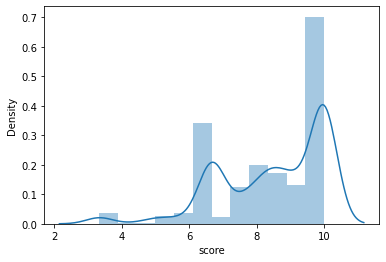

In [68]:
import seaborn as sns
sns.distplot(review_concat['score'])


In [69]:
#review_detail 파일과 합치기

review_concat_detail=pd.merge(review_concat, review_detail, how ='inner', left_on='name', right_on='가게이름')
review_concat_detail=review_concat_detail.drop(['Unnamed: 0','가게이름'], axis=1)

In [70]:
review_concat_detail

,name,review,score,가게 주소,음식 종류,가격 범위,리뷰개수,평점
0,원조할아버지손두부,예전 초당할머니 순두부는 살짝 변해서여길 못따라옴흰순두부는 맛과 향이 살짝...,9.259167,서울특별시 광진구 자양로 324,한정식 / 백반 / 정통 한식,만원 미만,72,4.5
1,이화만두,만두계의 강호동 덩치는 엄청 큰데 속은 왜 이렇게 부드러운거야이미 유명하고도...,9.999900,서울특별시 광진구 능동로 278-1,한정식 / 백반 / 정통 한식,만원 미만,6,4.3
2,서북면옥,서울특별시 광진구 구의동에 위치한 서북면옥에서 물냉면천원과 접시만두 조각 ...,9.083243,서울특별시 광진구 자양로 199-1,국수 / 면 요리,만원 미만,40,4.2
3,궤도에오르다,기본에 충실해서 더 맛있었던 핫도그였습니다 들어가서 음식이 나오기까지는 꽤 ...,8.999910,서울특별시 광진구 광나루로 416 건희빌딩 1F,기타 한식,만원 미만,40,4.0
4,콩이네,이사온 첫날 점심은 짜장면인데 집에서 먹기 싫어서밖으로 나와 망플을 켭니다위...,8.974269,서울특별시 광진구 긴고랑로9길 28 중곡제일시장 103호,기타 한식,만원 미만,13,4.0
...,...,...,...,...,...,...,...,...
1150,마우로아,성수 유명한 맛집에서 이제는 군자 맛집으로너무 가보고싶었던 곳이라 엄마랑 동...,9.166575,서울특별시 광진구 능동로 320 1F,칵테일 / 와인,3만원-4만원,24,4.2
1151,글래시,뚝섬역에서 가까운 글래시 와인바에요 와인바 찾던 중 우연히 발견했는데 가격...,9.473589,서울특별시 광진구 능동로 23-14 1F,칵테일 / 와인,3만원-4만원,19,3.5
1152,리바,제주도에서 하는 빛의 벙커를 서울에서도 한다고 하여워커힐 방문빛의 시어터 다...,6.666600,서울특별시 광진구 워커힐로 177 비스타 워커힐 1F,칵테일 / 와인,4만원 이상,5,NaN
1153,몽,분위기 어둑지고 아늑한 곳 인도풍 칵테일바 인데 분수도 있고 신발벗고 편히 ...,9.999900,서울특별시 광진구 아차산로33길 25,칵테일 / 와인,4만원 이상,1,NaN


In [63]:
review_concat_detail['음식 종류'].value_counts()

카페 / 디저트            171
고기 요리               126
기타 한식                69
기타 중식                64
회 / 스시               56
닭 / 오리 요리            54
정통 중식 / 일반 중식        52
해산물 요리               49
일반 주점                47
탕 / 찌개 / 전골          43
국수 / 면 요리            37
한정식 / 백반 / 정통 한식     34
치킨 / 호프 / 펍          33
브런치 / 버거 / 샌드위치      32
이자카야 / 오뎅 / 꼬치       28
이탈리안                 28
칵테일 / 와인             26
베이커리                 23
돈부리 / 일본 카레 / 벤토     21
기타 양식                20
전통 주점 / 포차           19
라멘 / 소바 / 우동         18
까스 요리                16
베트남 음식               13
정통 일식 / 일반 일식        11
스테이크 / 바베큐            8
남미 음식                 8
태국 음식                 6
퓨전 양식                 6
뷔페                    6
퓨전 한식                 5
철판 요리                 4
딤섬 / 만두               4
세계음식 기타               3
다국적 아시아 음식            3
패밀리 레스토랑              3
기타 일식                 3
프랑스 음식                3
인도 음식                 1
다국적 퓨전                1
퓨전 일식                 1
Name: 음식 종류, dty

In [114]:
keys =[*most]
keys

['매운향솥',
 '우마이도',
 '매화반점',
 '이이요',
 '호야초밥참치전문점',
 '빠오즈푸',
 '송화산시도삭면',
 '원조할아버지손두부',
 '피자힐',
 '오코노미야키식당하나']

In [77]:
review_concat_detail

,name,review,score,가게 주소,음식 종류,가격 범위,리뷰개수,평점
0,원조할아버지손두부,예전 초당할머니 순두부는 살짝 변해서여길 못따라옴흰순두부는 맛과 향이 살짝...,9.259167,서울특별시 광진구 자양로 324,한정식 / 백반 / 정통 한식,만원 미만,72,4.5
1,이화만두,만두계의 강호동 덩치는 엄청 큰데 속은 왜 이렇게 부드러운거야이미 유명하고도...,9.999900,서울특별시 광진구 능동로 278-1,한정식 / 백반 / 정통 한식,만원 미만,6,4.3
2,서북면옥,서울특별시 광진구 구의동에 위치한 서북면옥에서 물냉면천원과 접시만두 조각 ...,9.083243,서울특별시 광진구 자양로 199-1,국수 / 면 요리,만원 미만,40,4.2
3,궤도에오르다,기본에 충실해서 더 맛있었던 핫도그였습니다 들어가서 음식이 나오기까지는 꽤 ...,8.999910,서울특별시 광진구 광나루로 416 건희빌딩 1F,기타 한식,만원 미만,40,4.0
4,콩이네,이사온 첫날 점심은 짜장면인데 집에서 먹기 싫어서밖으로 나와 망플을 켭니다위...,8.974269,서울특별시 광진구 긴고랑로9길 28 중곡제일시장 103호,기타 한식,만원 미만,13,4.0
...,...,...,...,...,...,...,...,...
1150,마우로아,성수 유명한 맛집에서 이제는 군자 맛집으로너무 가보고싶었던 곳이라 엄마랑 동...,9.166575,서울특별시 광진구 능동로 320 1F,칵테일 / 와인,3만원-4만원,24,4.2
1151,글래시,뚝섬역에서 가까운 글래시 와인바에요 와인바 찾던 중 우연히 발견했는데 가격...,9.473589,서울특별시 광진구 능동로 23-14 1F,칵테일 / 와인,3만원-4만원,19,3.5
1152,리바,제주도에서 하는 빛의 벙커를 서울에서도 한다고 하여워커힐 방문빛의 시어터 다...,6.666600,서울특별시 광진구 워커힐로 177 비스타 워커힐 1F,칵테일 / 와인,4만원 이상,5,NaN
1153,몽,분위기 어둑지고 아늑한 곳 인도풍 칵테일바 인데 분수도 있고 신발벗고 편히 ...,9.999900,서울특별시 광진구 아차산로33길 25,칵테일 / 와인,4만원 이상,1,NaN


In [115]:
review_concat_detail[review_concat_detail['name'].isin(keys)]

,name,review,score,가게 주소,음식 종류,가격 범위,리뷰개수,평점
0,원조할아버지손두부,예전 초당할머니 순두부는 살짝 변해서여길 못따라옴흰순두부는 맛과 향이 살짝...,9.259167,서울특별시 광진구 자양로 324,한정식 / 백반 / 정통 한식,만원 미만,72,4.5
465,오코노미야키식당하나,정성이 가득 담긴 오코노미야키광진구에 있는 오코노미야키 가게 오코노미야키식당...,9.191827,서울특별시 광진구 능동로13길 111,철판 요리,만원-2만원,66,4.7
466,이이요,군자에 위치한 덮밥 성지인스타는 물론 다양한 매체에서 눈을 자극하며가보고 싶...,8.745787,서울특별시 광진구 능동로32길 6,회 / 스시,만원-2만원,101,4.3
468,우마이도,건대 라멘 맛집 우마이도에서 돈코츠라멘 먹고 왔습니다 이치란라멘 비슷한 ...,8.184442,서울특별시 광진구 능동로 135-2,라멘 / 소바 / 우동,만원-2만원,116,4.0
471,호야초밥참치전문점,런치 특호야 주문사진을 못찍음내부가 다소 정신은 없지만 가성비 훌륭한 곳다만...,7.299927,서울특별시 광진구 능동로13길 36,회 / 스시,만원-2만원,100,3.7
578,송화산시도삭면,여기 도삭면 진짜 맛있어요 지방에 사는 친구가 서울 올때마다 여기 찾습니다 ...,8.806496,서울특별시 광진구 뚝섬로27길 48,기타 중식,만원 미만,60,4.4
579,송화산시도삭면,여기 도삭면 진짜 맛있어요 지방에 사는 친구가 서울 올때마다 여기 찾습니다 ...,8.806496,서울특별시 광진구 아차산로30길 33,기타 중식,만원 미만,21,4.2
580,빠오즈푸,고기빠오즈는 앉은 자리에서 스무개도 먹을수 있을 맛 육즙이 팡팡 터져서 너무...,8.962873,서울특별시 광진구 광나루로 373,딤섬 / 만두,만원 미만,90,4.4
640,매운향솥,맛있다 ㅋㅋ진짜 소고기랑 스팸 왕창 때려넣고 만드는게 내입맛에는 맞...,8.869968,서울특별시 광진구 동일로18길 61,기타 중식,만원-2만원,118,4.4
649,매화반점,양꼬치는 안먹고 요리만 먹었어요고수무침 마파두부 부추볶음 어향가지 건두부무 ...,8.242342,서울특별시 광진구 동일로18길 105,기타 중식,만원-2만원,94,3.8


In [83]:
# # import re
# # review_filtered_1 = [str(string) for string in review_1]

# from krwordrank.hangle import normalize

# # texts = ['이것은 예문입니다', '각자의 데이터를 준비하세요' ]


# review_concat['review'] = [normalize(text, english=True, number=True) for text in review_concat['review']]

In [86]:
#카테고리 

count_vect_category = CountVectorizer(min_df=0, ngram_range=(1,2))
place_category = count_vect_category.fit_transform(review_concat_detail['음식 종류']) 
place_simi_cate = cosine_similarity(place_category, place_category) 
place_simi_cate_sorted_ind = place_simi_cate.argsort()[:, ::-1]

In [87]:
# 리뷰 텍스트 데이터 간의 텍스트 피쳐 벡터라이징
count_vect_review = CountVectorizer(min_df=2, ngram_range=(1,2))
place_review = count_vect_review.fit_transform(review_concat_detail['review']) 

# 리뷰 텍스트 간의 코사인 유사도 따지기
place_simi_review = cosine_similarity(place_review, place_review)
place_simi_review_sorted_ind = place_simi_review.argsort()[:, ::-1]

In [116]:
# 공식 1~5의 중요성을 짬뽕시키는 공식
# * 0.003 등의 가중치를 줘서 조절합니다.

# place_simi_co = (
#                  place_simi_cate * 0.1 # 공식 1. 카테고리 유사도
#                 + place_simi_review * 1 # 공식 2. 리뷰 텍스트 유사도
#                  #+ np.repeat([df['kakao_blog_review_qty'].values], len(df['kakao_blog_review_qty']) , axis=0) * 0.001  # 공식 3. 블로그 리뷰가 얼마나 많이 올라왔는지
#                  #+ np.repeat([df['kakao_star_point'].values], len(df['kakao_star_point']) , axis=0) * 0.005            # 공식 4. 블로그 별점이 얼마나 높은지
#                  #+ np.repeat([df['kakao_star_point_qty'].values], len(df['kakao_star_point_qty']) , axis=0) * 0.001    # 공식 5. 블로그 별점 평가가 얼마나 많이 됐는지
#                  )
import numpy as np
place_simi_co = (
                  place_simi_cate * 0.3 # 카테고리 유사도
                + place_simi_review * 1 # 리뷰 텍스트 유사도
                + np.repeat([review_concat_detail['score']], len(review_concat_detail['score']) , axis=0) * 0.005
                #평가가 얼마나 좋은지
                + np.repeat([review_concat_detail['리뷰개수'].values], len(review_concat_detail['리뷰개수']) , axis=0) * 0.003
                 #+리뷰가 얼마나 많은지
                 )


# 아래 place_simi_co_sorted_ind 는 그냥 바로 사용하면 됩니다.
place_simi_co_sorted_ind = place_simi_co.argsort()[:, ::-1] 


# 최종 구현 함수
def find_simi_place(df, sorted_ind, place_name, top_n=10):
    
    place_title = df[df['name'] == place_name]
    place_index = place_title.index.values
    similar_indexes = sorted_ind[place_index, :(top_n)]
    similar_indexes = similar_indexes.reshape(-1)
    return df.iloc[similar_indexes]




In [117]:
# place_simi_co = (
#                   place_simi_cate * 0.0 # 카테고리 유사도
#                 + place_simi_review * 1 # 리뷰 텍스트 유사도
#                  #+ np.repeat([df['kakao_blog_review_qty'].values], len(df['kakao_blog_review_qty']) , axis=0) * 0.001  # 공식 3. 블로그 리뷰가 얼마나 많이 올라왔는지
#                  #+ np.repeat([df['kakao_star_point'].values], len(df['kakao_star_point']) , axis=0) * 0.005            # 공식 4. 블로그 별점이 얼마나 높은지
#                  #+ np.repeat([df['kakao_star_point_qty'].values], len(df['kakao_star_point_qty']) , axis=0) * 0.001    # 공식 5. 블로그 별점 평가가 얼마나 많이 됐는지
#                  )

In [122]:
find_simi_place(review_concat_detail, place_simi_co_sorted_ind, '신토불이떡볶이', 5)

,name,review,score,가게 주소,음식 종류,가격 범위,리뷰개수,평점
12,신토불이떡볶이,신토불이떡볶이는 광진구에서도 워낙 유명한 곳이어서한지민 떡볶이로 나혼산에도 ...,7.281978,서울특별시 광진구 자양로43길 42,기타 한식,만원 미만,65,3.7
7,순금이떡볶이,매운걸 즐겨먹는 사람들이 먹으면 괜찮지만맵찔이에게는 그냥 고...,8.620603,서울특별시 광진구 자양로43길 43,기타 한식,만원 미만,29,3.9
9,골목에골목,깔끔하고 맛있고 양도 푸짐하다사장님 고생하시는거 같아 마...,8.194363,서울특별시 광진구 아차산로33길 51-4 2F,기타 한식,만원 미만,48,3.8
3,궤도에오르다,기본에 충실해서 더 맛있었던 핫도그였습니다 들어가서 음식이 나오기까지는 꽤 ...,8.999910,서울특별시 광진구 광나루로 416 건희빌딩 1F,기타 한식,만원 미만,40,4.0
61,청년다방,단호박 식혜 맛집 청년다방 떡볶이 덕후인 동기를 따라 처음 방문해보았다 동...,6.111050,서울특별시 광진구 구의강변로 88-1,기타 한식,만원 미만,6,NaN


In [123]:
find_simi_place(review_concat_detail, place_simi_co_sorted_ind, '이이요', 5)

,name,review,score,가게 주소,음식 종류,가격 범위,리뷰개수,평점
466,이이요,군자에 위치한 덮밥 성지인스타는 물론 다양한 매체에서 눈을 자극하며가보고 싶...,8.745787,서울특별시 광진구 능동로32길 6,회 / 스시,만원-2만원,101,4.3
471,호야초밥참치전문점,런치 특호야 주문사진을 못찍음내부가 다소 정신은 없지만 가성비 훌륭한 곳다만...,7.299927,서울특별시 광진구 능동로13길 36,회 / 스시,만원-2만원,100,3.7
499,싸다유정상초밥,자양시장에 위치한 곳으로 구의역과 건대입구 사이라고 생각해도 괜찮은 자리입니...,6.666600,서울특별시 광진구 자양로15길 90 1F,회 / 스시,만원-2만원,1,NaN
568,국선참치,군자역 번출구에 위치한 국선참치부위별로 먹기좋게 나옵니다 참치 해동상태가 좋...,9.999900,서울특별시 광진구 능동로36길 7,회 / 스시,2만원-3만원,1,NaN
555,와꼬스시,연어초밥 광어+연어초밥 이렇게 먹었는데 정말 쫄깃하고 신선하고 두 초밥...,7.777700,서울특별시 광진구 구의강변로 88 1F,회 / 스시,2만원-3만원,3,NaN


In [124]:
find_simi_place(review_concat_detail, place_simi_co_sorted_ind, '원조할아버지손두부', 5)

,name,review,score,가게 주소,음식 종류,가격 범위,리뷰개수,평점
0,원조할아버지손두부,예전 초당할머니 순두부는 살짝 변해서여길 못따라옴흰순두부는 맛과 향이 살짝...,9.259167,서울특별시 광진구 자양로 324,한정식 / 백반 / 정통 한식,만원 미만,72,4.5
468,우마이도,건대 라멘 맛집 우마이도에서 돈코츠라멘 먹고 왔습니다 이치란라멘 비슷한 ...,8.184442,서울특별시 광진구 능동로 135-2,라멘 / 소바 / 우동,만원-2만원,116,4.0
640,매운향솥,맛있다 ㅋㅋ진짜 소고기랑 스팸 왕창 때려넣고 만드는게 내입맛에는 맞...,8.869968,서울특별시 광진구 동일로18길 61,기타 중식,만원-2만원,118,4.4
18,아차산손두부,흠 모르겟다 산행 후 먹기에 웨이팅 없고 넓고 분위기 난다는 점은 좋다 근데...,7.999920,서울특별시 광진구 영화사로 68,한정식 / 백반 / 정통 한식,만원 미만,5,3.5
19,송림식당,...,7.435823,서울특별시 광진구 자양번영로 79 송림주차타워,한정식 / 백반 / 정통 한식,만원 미만,27,3.4


In [125]:
find_simi_place(review_concat_detail, place_simi_co_sorted_ind, '우마이도', 5)

,name,review,score,가게 주소,음식 종류,가격 범위,리뷰개수,평점
468,우마이도,건대 라멘 맛집 우마이도에서 돈코츠라멘 먹고 왔습니다 이치란라멘 비슷한 ...,8.184442,서울특별시 광진구 능동로 135-2,라멘 / 소바 / 우동,만원-2만원,116,4.0
419,초라멘,건대 근처 숨은 라멘 맛집가운데 빛나고 있는 노른자를 톡 터뜨리면꿀처럼 녹아...,9.411671,서울특별시 광진구 능동로13길 80 1F,라멘 / 소바 / 우동,만원 미만,17,4.3
424,부탄츄,부탄츄 건대점듣던대로 가게앞에서부터 구수한 돈코츠향이 물씬 풍긴다가지의 육수...,8.571343,서울특별시 광진구 동일로22길 117-14,라멘 / 소바 / 우동,만원 미만,14,3.9
421,라멘다이야,새로운 라멘집이 없나 찾아보다가 괜찮은 완탕면이 보여 찾아간 식당 입니다 예...,9.166575,서울특별시 광진구 자양번영로6길 67,라멘 / 소바 / 우동,만원 미만,20,4.2
433,멘쇼,멘쇼 사랑해요방문일자 너무 많음 한달에 두번씩 가는중 테마 일본 라멘 츠 ...,8.333250,서울특별시 광진구 군자로2길 3,라멘 / 소바 / 우동,만원 미만,21,3.4


In [126]:
find_simi_place(review_concat_detail, place_simi_co_sorted_ind, '서북면옥', 5)

,name,review,score,가게 주소,음식 종류,가격 범위,리뷰개수,평점
2,서북면옥,서울특별시 광진구 구의동에 위치한 서북면옥에서 물냉면천원과 접시만두 조각 ...,9.083243,서울특별시 광진구 자양로 199-1,국수 / 면 요리,만원 미만,40,4.2
183,태천면옥,지금 능라도강남점삼성동이 역삼동에 있을때 그곳에서 주방 면장을 하셨던 분이 ...,9.420196,서울특별시 광진구 광장로 49,국수 / 면 요리,만원-2만원,23,4.3
15,조씨네고기국수,키오스크로 주문하고나면 갖다주신다 바테이블이라 혼밥하기도 좋고 조용하다 정감...,8.108027,서울특별시 광진구 군자로3길 23,국수 / 면 요리,만원 미만,37,3.6
21,함흥본가면옥,언제나 사람많은 동네 냉면 실세나름 이 주변에서 냉면으로 함흥냉면으로는 이 ...,7.777700,서울특별시 광진구 광나루로 456,국수 / 면 요리,만원 미만,12,3.3
154,청산칡냉면,물냉면 기본 천원 왕만두 천원 곱배기 천원추가 해서 먹었는데 왕만두도 크기가...,9.999900,서울특별시 광진구 긴고랑로 69,국수 / 면 요리,만원 미만,1,NaN


In [127]:
find_simi_place(review_concat_detail, place_simi_co_sorted_ind, '아찌떡볶이', 5)

,name,review,score,가게 주소,음식 종류,가격 범위,리뷰개수,평점
16,아찌떡볶이,딱 아는 떡볶이 맛이지만 계속해서 손이가는 맛떡이 길고 얇아 오물오물 씹어먹...,7.777700,서울특별시 광진구 아차산로29길 53,기타 한식,만원 미만,24,3.6
9,골목에골목,깔끔하고 맛있고 양도 푸짐하다사장님 고생하시는거 같아 마...,8.194363,서울특별시 광진구 아차산로33길 51-4 2F,기타 한식,만원 미만,48,3.8
7,순금이떡볶이,매운걸 즐겨먹는 사람들이 먹으면 괜찮지만맵찔이에게는 그냥 고...,8.620603,서울특별시 광진구 자양로43길 43,기타 한식,만원 미만,29,3.9
12,신토불이떡볶이,신토불이떡볶이는 광진구에서도 워낙 유명한 곳이어서한지민 떡볶이로 나혼산에도 ...,7.281978,서울특별시 광진구 자양로43길 42,기타 한식,만원 미만,65,3.7
6,은혜떡볶이,와 여기 진짜 대학생 때부터 너무 가보고 싶었던 곳인데 이제서야 와본거 실화...,8.229084,서울특별시 광진구 광나루로 384 2F,기타 한식,만원 미만,33,3.9
